In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#buat directory gdrive untuk dataset
train_data_dir = '/content/drive/MyDrive/DatasetV8.2/train'
test_data_dir = '/content/drive/MyDrive/DatasetV8.2/tes'

In [ ]:
# input size
img_size = (224, 224)

In [ ]:
# Data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    channel_shift_range=20,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest',
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=64,
    class_mode='categorical',
    subset='training'  # Use subset 'training' for the training set
)

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=64,
    class_mode='categorical',
    subset='validation'  # Use subset 'validation' for the validation set
)

Found 627 images belonging to 7 classes.
Found 69 images belonging to 7 classes.


In [ ]:
def custom_vgg16():
    model = tf.keras.models.Sequential()

    model = tf.keras.models.Sequential()

    # Block 1
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))


    #freeze karna memakai weight vgg16 yang telah ditraining menggunakan imagenet dataset
    for layer in model.layers:
        layer.trainable = False


    return model

In [ ]:
model = custom_vgg16()
model.load_weights('/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [ ]:
# classification layer yang tidak difreeze
model.add(tf.keras.layers.Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
# compile model nya
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:



history = model.fit(train_generator, epochs=30, validation_data=validation_generator)


Epoch 1/30
10/10 [==============================] - 45s 3s/step - loss: 20.2706 - accuracy: 0.1467 - val_loss: 2.3763 - val_accuracy: 0.2029
Epoch 2/30
10/10 [==============================] - 24s 2s/step - loss: 1.9850 - accuracy: 0.2201 - val_loss: 1.7554 - val_accuracy: 0.2609
Epoch 3/30
10/10 [==============================] - 19s 2s/step - loss: 1.5932 - accuracy: 0.3907 - val_loss: 1.6043 - val_accuracy: 0.3188
Epoch 4/30
10/10 [==============================] - 20s 2s/step - loss: 1.3397 - accuracy: 0.4769 - val_loss: 1.5131 - val_accuracy: 0.4203
Epoch 5/30
10/10 [==============================] - 20s 2s/step - loss: 1.3632 - accuracy: 0.4689 - val_loss: 1.5572 - val_accuracy: 0.4348
Epoch 6/30
10/10 [==============================] - 19s 2s/step - loss: 1.2404 - accuracy: 0.5407 - val_loss: 1.3971 - val_accuracy: 0.4203
Epoch 7/30
10/10 [==============================] - 21s 2s/step - loss: 1.1426 - accuracy: 0.5694 - val_loss: 1.3731 - val_accuracy: 0.4348
Epoch 8/30
10/10 [=

In [ ]:
model.save('/content/drive/MyDrive/vgg16_JULY25FINAL.h5')

In [ ]:
import matplotlib.pyplot as plt

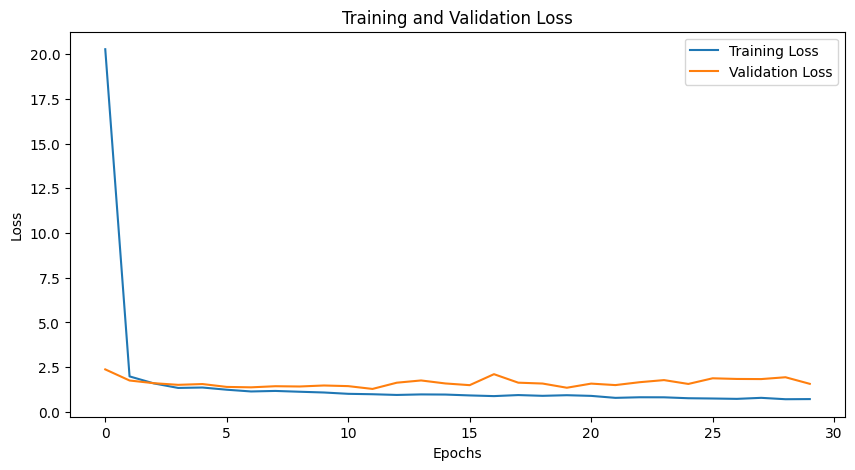

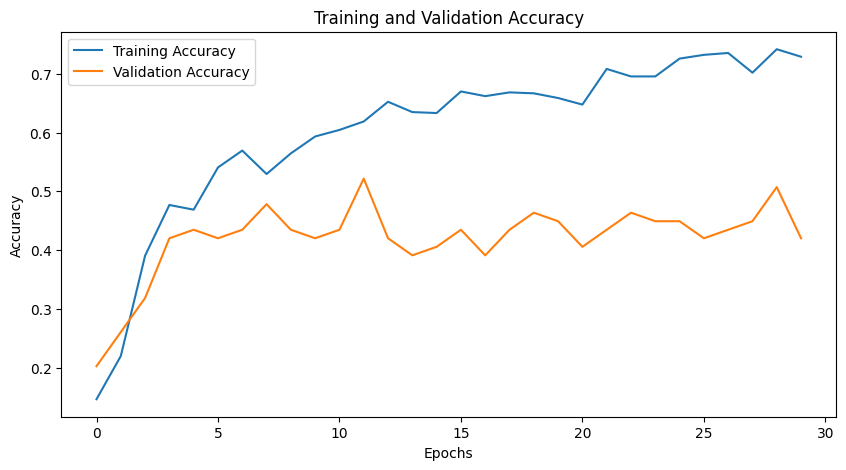

In [ ]:
# train dan val loss grafik
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# train dan val akurasi grafik
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create the test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 325 images belonging to 7 classes.


In [ ]:
# Get true labels for test data
true_labels = test_generator.classes

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

325/325 [==============================] - 7s 18ms/step


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 56.00%


In [ ]:
# Calculate precision, recall, and f1-score for each label
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       Blues       0.42      0.50      0.46        46
     Country       0.53      0.32      0.40        50
         EDM       0.76      0.68      0.72        50
        Jazz       0.50      0.50      0.50        50
       Metal       0.69      0.83      0.75        46
         Pop       0.65      0.68      0.67        44
        Rock       0.36      0.41      0.39        39

    accuracy                           0.56       325
   macro avg       0.56      0.56      0.55       325
weighted avg       0.56      0.56      0.56       325



In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[23  4  1 10  1  1  6]
 [13 16  2  7  1  7  4]
 [ 2  0 34  3  5  2  4]
 [11  3  0 25  3  3  5]
 [ 0  0  5  1 38  0  2]
 [ 3  3  0  1  0 30  7]
 [ 3  4  3  3  7  3 16]]


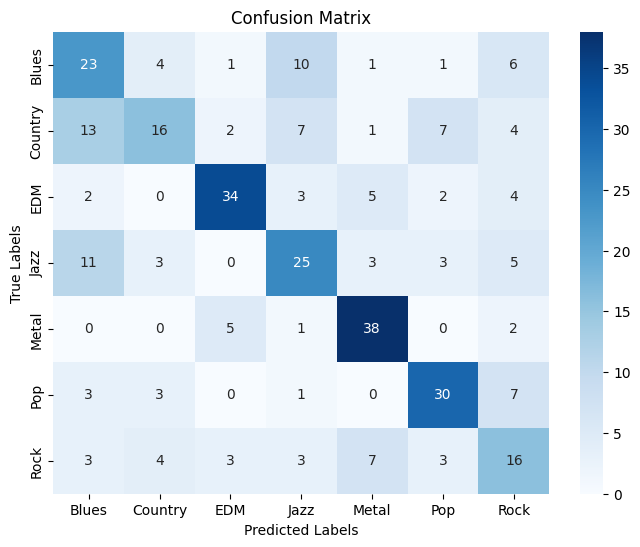

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have true_labels and predicted_labels
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create a function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# List of label names
labels = test_generator.classes

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, labels)
